# Predicting Bike Rentals
## 1. Introduction to the Dataset
Many U.S. cities have communal bike sharing stations where one can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District of Columbia collects detailed data on the number of bicycles people rent by the hour and day.

The data have been compiled into a CSV file which can be downloaded at [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). The file contains `17380` rows, with each row representing the number of bike rentals for a single hour of a single day.

In this project, we will try to predict the total number of bikes people rented in a given hour. We will predict the `cnt` (count) column using all of the other columns, except for `casual` and `registered`. To accomplish this, we create a few different machine learning models and evaluate their performance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Let's make a histogram of the `cnt` column of `bike_rentals`, and take a look at the distribution of total rentals.

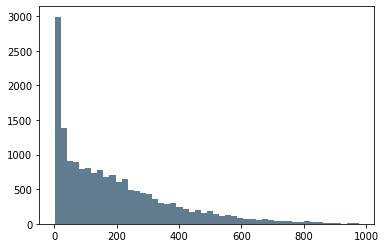

In [2]:
# MS: This makes a histogram with matplotlib,
# but we could also use pandas, seaborn...
plt.hist(bike_rentals['cnt'], bins=50, color='#607c8e')
plt.show()

We use the `corr` method on the `bike_rentals` dataframe to explore how each column is correlated with `cnt`.
Compute pairwise correlation of columns, excluding NA/null values.

In [3]:
corrmat = bike_rentals.corr(method='pearson')
corrmat

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


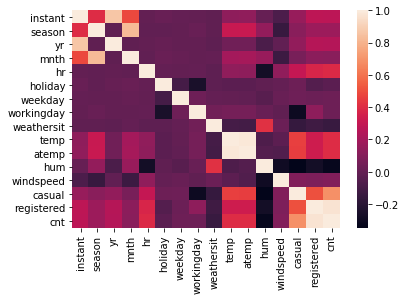

In [4]:
# MS: Use the seaborn.heatmap() function to generate a correlation matrix heatmap.
%matplotlib inline
sns.heatmap(corrmat)
plt.show()

It appears that the columns `casual` and `registered` are the most correlated with `cnt`. This makes sense since `cnt` is derived from them.

## 2. Calculating Features
It is helpful to calculate features before applying machine learning models. Adding new features can enhance the accuracy of models by introducing new information or distilling existing information.

In [5]:
bike_rentals['hr'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

The `hr` column in `bike_rentals` contains the hours during which bikes are rented, from 0 to 23. A machine treats each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This bundles similar times together, enabling the model to make better decisions.

In [6]:
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    if hour >= 6 and hour < 12:
        return 1
    if hour >= 12 and hour < 18:
        return 2
    if hour >= 18 and hour < 24:
        return 3

Use the `apply` method on series objects to apply the function to each item in the `hr` column. Assign the result to the `time_label` column of `bike_rentals`.

In [7]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

Quick check:

In [8]:
bike_rentals['time_label'].head(30)

0     4
1     4
2     4
3     4
4     4
5     4
6     1
7     1
8     1
9     1
10    1
11    1
12    2
13    2
14    2
15    2
16    2
17    2
18    3
19    3
20    3
21    3
22    3
23    3
24    4
25    4
26    4
27    4
28    4
29    1
Name: time_label, dtype: int64

We observe that we have the four labels for morning, afternoon, evening, and night, as we desired.

## 3. Splitting the Data into Train and Test Sets
Before applying any machine learning algorithm, we split the data into **train** and **test sets**. We will train the algorithm using the training set, and then evaluate its accuracy on the testing set (__out-of-sample error__).

We also need to pick an **error metric** that we will use to evaluate the performance of the machine learning algorithms. For example, we might choose among the following error metrics:
- mean squared error (MSE);
- root mean squared error (RMSE);
- mean absolute error (MAE);
- area under the curve (AUC).

In [9]:
from sklearn.metrics import mean_squared_error

Using the `sample` method, we select 80% of the rows in `bike_rentals` to be part of the training set.

In [10]:
train = bike_rentals.sample(frac=0.80, replace=False, random_state=1)

We select the rows that are in `bike_rentals` but not in `train` to be in the test set, and assign the result to `test`. To do this, we need to use the row indices in `bike_rentals` that are NOT the same as the indices in the `train` dataframe:

In [11]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## 4. Linear Regression
Let's apply linear regression to the data. We create a list of predictor columns to use in training and predictions. We ignore the columns `cnt`, `casual`, `dteday`, and `registered`. Also, we ignore `instant` and `atemp`.

In [12]:
features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']
target = ['cnt']

We use the `LinearRegression` class from `sklearn` to fit a linear regression model on `train`.

In [13]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(train[features], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make predictions for the `cnt` column of the `test` data.

In [14]:
predictions = linear_model.predict(test[features])

Compute the error between the predictions and the `cnt` column of `test`.
We choose to compute the Root Mean Squared Error (RMSE).

In [15]:
rmse = np.sqrt(mean_squared_error(test[target], predictions))

# Visualize the RMSE
print("{:0.2f}".format(rmse))

140.07


## 5. Decision Tree Algorithm
Now we will apply the decision tree algorithm. Decision trees tend to predict outcomes much more reliably than linear regression models. Moreover, since a decision tree is a fairly complex model, it also tends to **overfit**, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to **instability**, i.e., small changes in the input data can result in a very different output model.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

# Initialize the classifier
clf = DecisionTreeRegressor(min_samples_leaf=10, max_depth=16, random_state=1)

# Fit the classifier to the training data.
clf.fit(train[features], train[target])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

The option `min_samples_leaf` in the `DecisionTreeRegressor` indicates the minimum number of samples required to be at a leaf node.
A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [25]:
# Make predictions on the training set, compute the RMSE, and assign it to train_rmse.
train_predictions = clf.predict(train[features])
train_rmse = np.sqrt(mean_squared_error(train[target], train_predictions))

# Make predictions on the test set, compute the RMSE, and assign it to test_rmse.
test_predictions = clf.predict(test[features])
test_rmse = np.sqrt(mean_squared_error(test[target], test_predictions))

# To check whether the Decision Tree is overfitting:
print("Train RMSE: {:0.2f}".format(train_rmse))
print(" Test RMSE: {:0.2f}".format(test_rmse))
print("       Gap: {:0.2f}".format(test_rmse-train_rmse))

Train RMSE: 43.37
 Test RMSE: 54.01
       Gap: 10.65


I experimented with various values of the parameters `min_samples_leaf` and `max_depth` to reduce the gap, i.e., to make `train_rmse` and `test_rmse` closer to each other.

## 6. Random Forests
We can now try to apply the Random Forest algorithm, which improves on the decision tree algorithm. Due to the way random forests are constructed, they tend to overfit much less than decision trees.

In [37]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=50, min_samples_leaf=10, max_depth=15, random_state=1)

# MS: Fit a random forest algorithm to the train data.
random_forest.fit(train[features], train[target].values.ravel())

# Make predictions on the training set, compute the RMSE, and assign it to train_rmse.
train_predictions = random_forest.predict(train[features])
train_rmse = np.sqrt(mean_squared_error(train[target], train_predictions))

# Make predictions on the test set, compute the RMSE, and assign it to test_rmse.
test_predictions = random_forest.predict(test[features])
test_rmse = np.sqrt(mean_squared_error(test[target], test_predictions))

# To check whether the Random Forest is overfitting:
print("Train RMSE: {:0.2f}".format(train_rmse))
print(" Test RMSE: {:0.2f}".format(test_rmse))
print("       Gap: {:0.2f}".format(test_rmse-train_rmse))

Train RMSE: 42.54
 Test RMSE: 50.86
       Gap: 8.31


It is still overfitting, but less than the decision tree model.